<a href="https://colab.research.google.com/github/SarathiPrabu/BankingSolution/blob/master/midTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvf /content/lfw.tgz

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image


In [3]:
#ResNet50 model is used for this project
model = tf.keras.applications.ResNet50(include_top= False,weights="imagenet")
dataset_dir = "/content/lfw"
# We are using the folder names as labels
labels = os.listdir(dataset_dir)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
index = 0
features_dict = {}
name_dict={}
path_dict={}
# All folders are iterated
for i in range(len(labels)):
    label_dir = os.path.join(dataset_dir, labels[i])
    image_files = os.listdir(label_dir)
    # Extract features for each image
    for image_file in image_files:
        image_path = os.path.join(label_dir, image_file)
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        features_dict[index] = features.flatten()
        path_dict[index]=image_path
        del features
        del x
        del img
        del image_path
        index += 1

In [42]:

# Function to extract features from a test image
def extract_test_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Path to the test image
test_image_path = "/content/lfw/Feliciano_Lopez/Feliciano_Lopez_0001.jpg"

# Extract features from the test image
test_features = extract_test_features(test_image_path)


1/1 [==============================] - 0s 34ms/step


In [19]:
# Convert the dictionary of features to a single array
train_features = np.array(list(features_dict.values()))
# Fit a k-nearest neighbors model on the train features
knn_model = NearestNeighbors(n_neighbors=10)  # Set the number of neighbors you want to retrieve
knn_model.fit(train_features)

# Find the nearest neighbors of the test features
distances, indices = knn_model.kneighbors([test_features])



In [65]:
def plot_images():
    # Display the test image
    plt.figure(figsize=(4, 4))
    img = image.load_img(test_image_path)
    plt.subplot(3, 4, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Test Image')
    print(test_image_path)

    # Display the similar images
    for i, idx in enumerate(indices.flatten()):
        img = image.load_img(path_dict[idx])
        plt.subplot(3, 4, i + 2)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'# {i + 1}/{idx}')


    plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Adjust spacing between subplots

    plt.show()


1/1 [==============================] - 0s 28ms/step
/content/lfw/Feliciano_Lopez/Feliciano_Lopez_0001.jpg


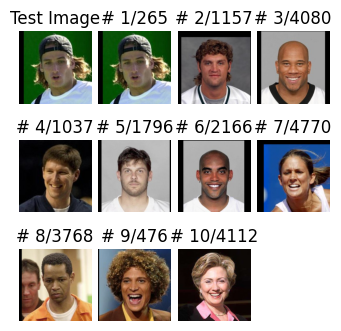

In [66]:
# Path to the test image
test_image_path = "/content/lfw/Feliciano_Lopez/Feliciano_Lopez_0001.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 29ms/step
/content/lfw/Howard_Dean/Howard_Dean_0003.jpg


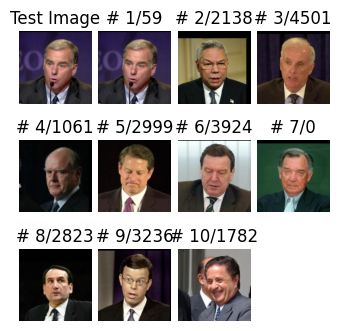

In [67]:
# Path to the test image
test_image_path = "/content/lfw/Howard_Dean/Howard_Dean_0003.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 43ms/step
/content/lfw/Gary_Williams/Gary_Williams_0001.jpg


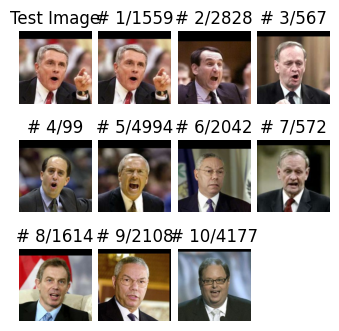

In [68]:
# Path to the test image
test_image_path = "/content/lfw/Gary_Williams/Gary_Williams_0001.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 29ms/step
/content/lfw/Jennifer_Garner/Jennifer_Garner_0012.jpg


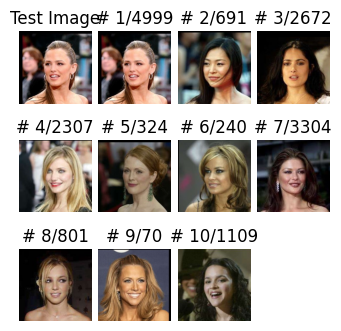

In [69]:
# Path to the test image
test_image_path = "/content/lfw/Jennifer_Garner/Jennifer_Garner_0012.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 43ms/step
/content/lfw/Ali_Naimi/Ali_Naimi_0008.jpg


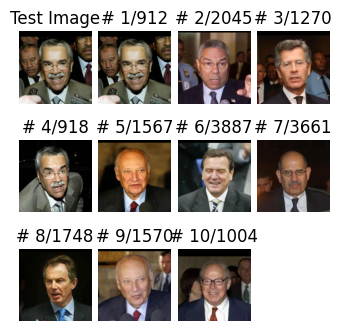

In [72]:
# Path to the test image
test_image_path = "/content/lfw/Ali_Naimi/Ali_Naimi_0008.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 29ms/step
/content/lfw/Ali_Naimi/Ali_Naimi_0001.jpg


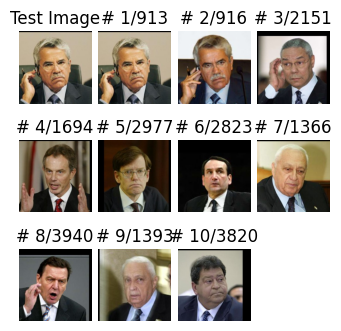

In [73]:
# Path to the test image
test_image_path = "/content/lfw/Ali_Naimi/Ali_Naimi_0001.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

1/1 [==============================] - 0s 26ms/step
/content/lfw/Mike_Weir/Mike_Weir_0001.jpg


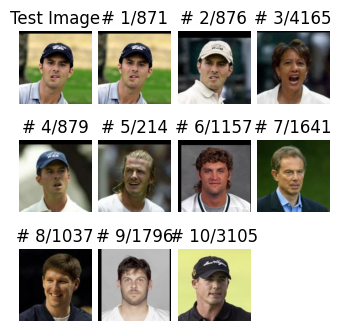

In [83]:
# Path to the test image
test_image_path = "/content/lfw/Mike_Weir/Mike_Weir_0001.jpg"
test_features = extract_test_features(test_image_path)
distances, indices = knn_model.kneighbors([test_features])
plot_images()

In [57]:
path_dict[2500]

'/content/lfw/Tim_Henman/Tim_Henman_0008.jpg'

In [71]:
path_dict

{0: '/content/lfw/Ray_Price/Ray_Price_0001.jpg',
 1: '/content/lfw/Larry_Wilmore/Larry_Wilmore_0001.jpg',
 2: '/content/lfw/Suh_Chung-won/Suh_Chung-won_0001.jpg',
 3: '/content/lfw/Catherine_Ndereba/Catherine_Ndereba_0001.jpg',
 4: '/content/lfw/Fred_Funk/Fred_Funk_0001.jpg',
 5: '/content/lfw/Fred_Funk/Fred_Funk_0002.jpg',
 6: '/content/lfw/Jack_Knowlton/Jack_Knowlton_0001.jpg',
 7: '/content/lfw/Andre_Bucher/Andre_Bucher_0001.jpg',
 8: '/content/lfw/Nadia_Petrova/Nadia_Petrova_0004.jpg',
 9: '/content/lfw/Nadia_Petrova/Nadia_Petrova_0003.jpg',
 10: '/content/lfw/Nadia_Petrova/Nadia_Petrova_0005.jpg',
 11: '/content/lfw/Nadia_Petrova/Nadia_Petrova_0001.jpg',
 12: '/content/lfw/Nadia_Petrova/Nadia_Petrova_0002.jpg',
 13: '/content/lfw/Tommy_Tubberville/Tommy_Tubberville_0001.jpg',
 14: '/content/lfw/Mahmoud_Al_Zhar/Mahmoud_Al_Zhar_0001.jpg',
 15: '/content/lfw/Herb_Brooks/Herb_Brooks_0001.jpg',
 16: '/content/lfw/Martin_Kristof/Martin_Kristof_0001.jpg',
 17: '/content/lfw/Andres_Pastra